# Assignment - Clustering

#### 1. Reproduce E8-1: K-Means algorithm with your own data file (feel free to use freedom.csv or another data source file from the DSC repository)

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [128]:
# Load input data
df = pd.read_csv("fredom.csv")
df.head()

,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,4.5,6.5,6.5,6.5,6.5,6.0,7.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.5,5.5
1,Albania,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,Algeria,6.0,6.0,6.0,6.5,6.0,6.0,6.0,6.0,6.0,...,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5
3,Andorra,3.5,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Angola,NaN,NaN,NaN,6.0,6.0,7.0,7.0,7.0,7.0,...,5.5,5.5,5.5,5.5,5.5,5.5,6.0,6.0,6.0,5.5


In [129]:
df.shape

(193, 48)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 48 columns):
country    193 non-null object
1972       142 non-null float64
1973       143 non-null float64
1974       145 non-null float64
1975       151 non-null float64
1976       152 non-null float64
1977       148 non-null float64
1978       151 non-null float64
1979       154 non-null float64
1980       155 non-null float64
1981       157 non-null float64
1982       0 non-null float64
1983       158 non-null float64
1984       159 non-null float64
1985       159 non-null float64
1986       159 non-null float64
1987       159 non-null float64
1988       159 non-null float64
1989       160 non-null float64
1990       160 non-null float64
1991       179 non-null float64
1992       183 non-null float64
1993       188 non-null float64
1994       189 non-null float64
1995       189 non-null float64
1996       189 non-null float64
1997       189 non-null float64
1998       189 non-null float64
19

In [131]:
df.describe()

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,142.000000,143.000000,145.000000,151.000000,152.000000,148.000000,151.000000,154.000000,155.000000,157.000000,...,192.000000,192.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,4.299296,4.318182,4.320690,4.396026,4.413158,4.380405,4.317881,4.227273,4.261290,4.251592,...,3.309896,3.307292,3.310881,3.316062,3.297927,3.331606,3.349741,3.383420,3.391192,3.422280
std,2.008016,2.014512,1.985779,1.973757,2.005941,1.999784,2.005396,2.012291,2.009988,2.041731,...,1.971407,1.977451,1.972925,1.979347,1.978556,2.013337,2.020910,2.033735,2.035767,2.031438
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.250000,2.000000,2.500000,2.000000,...,1.500000,1.375000,1.500000,1.500000,1.000000,1.500000,1.500000,1.500000,1.500000,1.500000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.750000,5.000000,5.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.500000,5.500000,5.500000,5.500000,5.500000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [132]:
# to check null values in data
df.isnull().sum()

country      0
1972        51
1973        50
1974        48
1975        42
1976        41
1977        45
1978        42
1979        39
1980        38
1981        36
1982       193
1983        35
1984        34
1985        34
1986        34
1987        34
1988        34
1989        33
1990        33
1991        14
1992        10
1993         5
1994         4
1995         4
1996         4
1997         4
1998         4
1999         3
2000         3
2001         3
2002         3
2003         3
2004         3
2005         3
2006         1
2007         1
2008         1
2009         1
2010         1
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
dtype: int64

In [140]:
df = df.dropna(axis=1)

In [147]:
df.isnull().sum()

country    0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
dtype: int64

In [148]:
X = df.values[:,1:]
X

array([[6.0, 6.0, 6.0, ..., 6.0, 5.5, 5.5],
       [3.0, 3.0, 3.0, ..., 3.0, 3.0, 3.0],
       [5.5, 5.5, 5.5, ..., 5.5, 5.5, 5.5],
       ...,
       [6.0, 6.0, 6.0, ..., 6.5, 6.5, 6.5],
       [3.5, 3.5, 3.5, ..., 4.0, 4.0, 4.0],
       [6.0, 6.0, 5.5, ..., 5.0, 5.5, 5.0]], dtype=object)

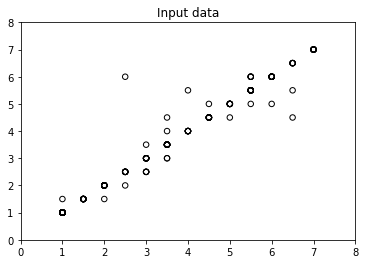

In [149]:
# Plot the input data
plt.figure()
plt.title('Input data')

# first column
x_min = X[:, 0].min()
x_max = X[:, 0].max()

# second column
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# plot the points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()

In [150]:

# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,20)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
print("Distortion: ", distortions)

Distortion:  [2.4251924766945967, 1.582881413856715, 1.252584763652939, 1.0682866738647696, 0.9002391490201255, 0.8135995822711614, 0.7256181714956133, 0.7222563922820431, 0.6780479975703513, 0.629801456318216, 0.6005241960197696, 0.5840385758509252, 0.5728669997422432, 0.5588147336379405, 0.5340044492925099, 0.5134292119570746, 0.514058779190042, 0.5103040452563622]


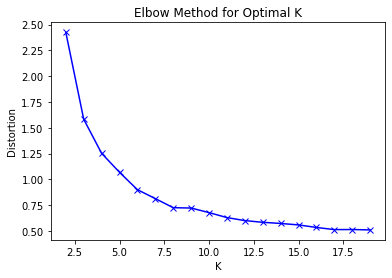

In [151]:
# Plot the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [152]:
# Optimal number of clusters K
num_clusters = 5

In [153]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

# Train the KMeans clustering model
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [154]:
# Predict 5 clusters in X
y = kmeans.predict(X)
y

array([4, 1, 4, 2, 4, 1, 1, 3, 2, 2, 0, 2, 0, 3, 2, 0, 2, 2, 1, 3, 1, 3,
       1, 1, 4, 1, 3, 4, 4, 0, 2, 2, 0, 0, 2, 0, 3, 3, 0, 4, 2, 3, 2, 0,
       2, 2, 2, 4, 2, 1, 1, 4, 1, 0, 0, 2, 0, 0, 3, 2, 2, 4, 4, 1, 2, 2,
       1, 2, 3, 4, 4, 1, 4, 3, 1, 2, 1, 1, 0, 4, 2, 2, 2, 1, 2, 4, 4, 3,
       2, 4, 4, 0, 1, 3, 1, 3, 4, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 4, 2, 1,
       2, 1, 2, 2, 1, 3, 3, 4, 1, 2, 3, 2, 2, 3, 3, 3, 0, 3, 2, 4, 3, 2,
       1, 3, 1, 1, 1, 2, 2, 4, 1, 0, 4, 1, 2, 1, 0, 1, 1, 1, 1, 3, 2, 2,
       1, 0, 1, 1, 0, 2, 3, 2, 2, 2, 0, 1, 2, 2, 0, 0, 3, 4, 1, 3, 1, 1,
       1, 3, 0, 2, 4, 3, 0, 2, 2, 2, 0, 1, 4, 0, 0, 3, 4], dtype=int32)

In [155]:
# See the predicted labels of clusters
# cluster labels are stored in variable 'kmeans.labels_'
print(kmeans.labels_)

[4 1 4 2 4 1 1 3 2 2 0 2 0 3 2 0 2 2 1 3 1 3 1 1 4 1 3 4 4 0 2 2 0 0 2 0 3
 3 0 4 2 3 2 0 2 2 2 4 2 1 1 4 1 0 0 2 0 0 3 2 2 4 4 1 2 2 1 2 3 4 4 1 4 3
 1 2 1 1 0 4 2 2 2 1 2 4 4 3 2 4 4 0 1 3 1 3 4 2 2 2 3 3 3 3 3 2 2 4 2 1 2
 1 2 2 1 3 3 4 1 2 3 2 2 3 3 3 0 3 2 4 3 2 1 3 1 1 1 2 2 4 1 0 4 1 2 1 0 1
 1 1 1 3 2 2 1 0 1 1 0 2 3 2 2 2 0 1 2 2 0 0 3 4 1 3 1 1 1 3 0 2 4 3 0 2 2
 2 0 1 4 0 0 3 4]


Cluster  0 :  (28, 8)


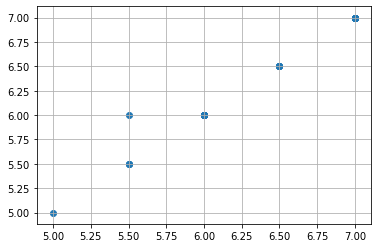

Cluster  1 :  (44, 8)


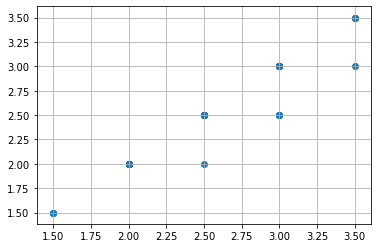

Cluster  2 :  (57, 8)


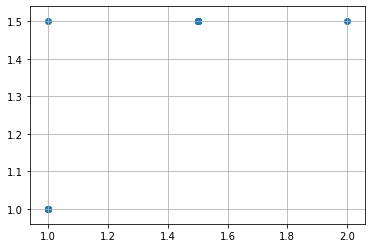

Cluster  3 :  (35, 8)


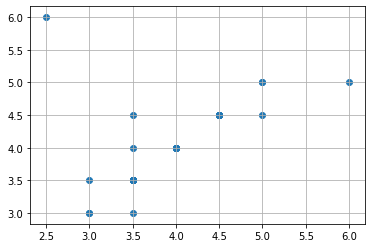

Cluster  4 :  (29, 8)


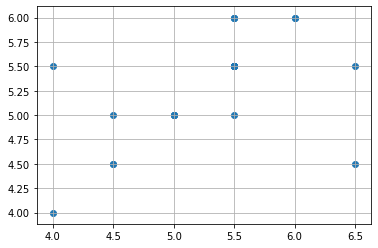

In [156]:
# Split the clusters, for demo purpose only
for i in range(num_clusters):
    # slice the cluster
    cluster = X[y == i]    
    # print the shape
    print("Cluster ", i, ": ", cluster.shape)    
    # plot the points of this cluster
    plt.scatter(cluster[:, 0], cluster[:, 1])   
    plt.grid(True)
    plt.show()

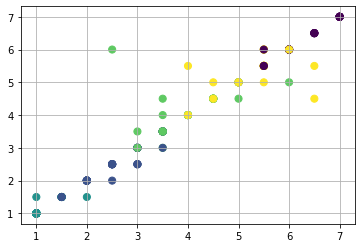

In [157]:
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

plt.grid(True)
plt.show()

In [158]:
# See the cluster centres, created during the clustering
# cluster centres are stored in a variable named 'cluster_centers_'
print(kmeans.cluster_centers_)

[[6.30357143 6.32142857 6.42857143 6.48214286 6.55357143 6.60714286
  6.625      6.60714286]
 [2.47727273 2.40909091 2.43181818 2.39772727 2.44318182 2.45454545
  2.44318182 2.47727273]
 [1.0877193  1.0877193  1.07017544 1.07894737 1.09649123 1.12280702
  1.14035088 1.1754386 ]
 [3.91428571 4.01428571 3.84285714 3.85714286 3.8        3.87142857
  3.91428571 4.01428571]
 [5.32758621 5.32758621 5.31034483 5.5        5.51724138 5.53448276
  5.5        5.48275862]]


### Store the KNN-Model in a file

In [160]:
!pip install joblib

In [162]:
import joblib
joblib.dump(kmeans, 'knn-model.pkl')

['knn-model.pkl']

#### 2. Run the notebook from E8-3: Hierarchical and note the difference between this algorithm and the previous one. Write an answer to the questions

How many types of hierarchical clustering are shown in the exercise?

https://github.com/datsoftlyngby/soft2021spring-ds/blob/main/Code/E8-3-Hierarchical.ipynb

How do they differ?

#### 3. Run the notebook from E9-4: Mean Shift. Try to experiment the solution with various number of clusters. Observed the process of implementation of the Mean Shift algorithm and answer the questions:

What is the difference between k-means and mean shift?

- Mean-Shift algorithm determines the number of clusters and formes the clusters. It is a type of unsupervised machine learning algorithm. Unlike the more popular K-Means clustering, mean shift doesn’t require an estimate of the number of clusters. Instead, it creates a Kernel Density Estimation (KDE) for the dataset. KDE is a method to estimate the distribution of the data points. It works by placing a kernel on each data point. The kernel in math term is a weighting function that will apply weights for individual data points. Adding all the individual kernel generates the probability. (i.e Gaussian Kernel)


- Whereas K-means is a method of vector quantization, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

In which occasions would you prefer to use mean shift algorithm?

* This algorithm is mostly used for computer vision (i.e Image Processing, Video Tracking and Image Segmentation). Mean Shift algorithm would also have been really effective in big data problems, if it were not so computationally expensive.